In [72]:
include("../taxi_model.jl")

train_flow_ood (generic function with 1 method)

# Helper Functions

In [22]:
using PGFPlots

In [23]:
using Distributions

In [103]:
function plot_results(npn, im; χ_prior = 0.0, n_prior = 1.0, simple = false,
    ymin = -1.1, ymax = 1.1)
    # Prior
    μ₀_prior, σ₀²_prior = to_normal(χ_prior, n_prior, npn.σ²)
    println(σ₀²_prior)
    f_prior(x) = pdf(Normal(μ₀_prior, √(σ₀²_prior)), x)

    # Posterior
    if simple
        χ_post, n_post = get_posterior_simple(npn, im, χ_prior = χ_prior, n_prior = n_prior)
    else
        χ_post, n_post = get_posterior(npn, im, χ_prior = χ_prior, n_prior = n_prior)
    end
    μ₀, σ₀² = to_normal(χ_post, n_post, npn.σ²)
    println(σ₀²)
    f(x) = pdf(Normal(μ₀, √(σ₀²)), x)

    if simple
        χ_post_rand, n_post_rand = get_posterior_simple(npn, rand(128), χ_prior = χ_prior, n_prior = n_prior)
    else
        χ_post_rand, n_post_rand = get_posterior(npn, rand(128), χ_prior = χ_prior, n_prior = n_prior)
    end
    μ₀_rand, σ₀²_rand = to_normal(χ_post_rand, n_post_rand, npn.σ²)
    println(σ₀²_rand)
    f_rand(x) = pdf(Normal(μ₀_rand, √(σ₀²_rand)), x)

    ax1 = Axis(Plots.Linear(f_prior, (ymin, ymax)))
    ax1.xlabel = L"$\mu$"
    ax1.ylabel = L"$f(\mu)$"
    ax1.title = "Prior"
    ax1.height = "5.5cm"
    ax1.width = "5.5cm"
    ax1.ymin = 0.0

    ax2 = Axis(Plots.Linear(f, (ymin, ymax)))
    ax2.xlabel = L"$\mu$"
    ax2.ylabel = L"$f(\mu)$"
    ax2.title = "Posterior Training Image"
    ax2.height = "5.5cm"
    ax2.width = "5.5cm"
    ax2.ymin = 0.0

    ax3 = Axis(Plots.Linear(f_rand, (ymin, ymax)))
    ax3.xlabel = L"$\mu$"
    ax3.ylabel = L"$f(\mu)$"
    ax3.title = "Posterior Random"
    ax3.height = "5.5cm"
    ax3.width = "5.5cm"
    ax3.ymin = 0.0

    g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
    push!(g, ax1)
    push!(g, ax2)
    push!(g, ax3)

    return g
end

plot_results (generic function with 1 method)

# Nominal Training

In [66]:
X, y = get_taxi_data(1);
# y = y .* 10.0

In [98]:
h = 16
0.5 * (h * log(2π) + log(h + 1))

16.119623203302872

In [99]:
npn = natPN(h = 16, σ² = 0.01)

nepoch = 50
lr = 1e-2
batchsize = 128

npn = train_npn(npn, X, y, nepoch, lr, batchsize, simple = true);

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.8114513224317603
1 / n: 473711.13484560215
entropy reg term: -0.00013065967745164972
l = 2.4258164728175908e8


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.39631240304724125
1 / n: 4880.485259189722
entropy reg term: -8.492996503515709e-5
l = 2.519099604257014e6


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.39263720677702724
1 / n: 2556.3018702140052
entropy reg term: -7.846312761863296e-5
l = 1.3289295423634332e6


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.38220347930557863
1 / n: 1540.385066341871
entropy reg term: -7.339783197469458e-5
l = 808245.9345277934
mse: 0.3781431265110818
1 / n: 1017.4323503501203
entropy reg term: -6.92503269037625e-5
l = 540286.2560004615


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.36472404044762724
1 / n: 716.971445272926
entropy reg term: -6.575029442811752e-5
l = 385763.2171865058


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.3569766815042069
1 / n: 528.846049487557
entropy reg term: -6.270691628452951e-5
l = 289046.35132470337


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.34495277203975894
1 / n: 403.88103879661577
entropy reg term: -6.001113634053414e-5
l = 224448.64306660113


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.33356755032622365
1 / n: 316.65156385635896
entropy reg term: -5.7577920907192884e-5
l = 179204.22979126294


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.3244960471718812
1 / n: 253.2633128134582
entropy reg term: -5.534416006888801e-5
l = 146284.98543948098
mse: 0.30649398100508674
1 / n: 205.56554443904275
entropy reg term: -5.325742168039497e-5
l = 120942.02331245043


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.2794562289697512
1 / n: 168.11177792730402
entropy reg term: -5.124591576150384e-5
l = 100381.36298412208
mse: 0.23648261733695114
1 / n: 136.01459123171404
entropy reg term: -4.912659924539878e-5
l = 81747.35556547064


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.21709136913450686
1 / n: 33.83269227889481
entropy reg term: -3.500924574790465e-5
l = 28437.398621747074
mse: 0.17975998939605395
1 / n: 1.6781111747210542
entropy reg term: 1.495562030157022e-6
l = 10062.905144262899


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.16090673055025095
1 / n: 2.180750053690038
entropy reg term: -3.3407209748436717e-7
l = 9354.968460617236


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.15361136308034923
1 / n: 2.29223829152268
entropy reg term: -1.0012983213117596e-6
l = 9038.527282308753


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.1151819391180634
1 / n: 2.2203292854297634
entropy reg term: -4.778189699366148e-7
l = 7034.123632341572
mse: 0.1205452584403823
1 / n: 2.2432863241000724
entropy reg term: -9.395707893271832e-7
l = 7320.479349026567


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.11135599157328023
1 / n: 2.250242390266685
entropy reg term: -8.488236467980582e-7
l = 6853.550437770783


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.1078630177326581
1 / n: 2.6810303947224843
entropy reg term: -1.3274996055745178e-6
l = 6895.27339033021


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.08950482944933284
1 / n: 2.0781326270041953
entropy reg term: -3.015130633323776e-7
l = 5646.651018457302


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.08307525877259073
1 / n: 2.0099679670119692
entropy reg term: -8.720636649900385e-8
l = 5282.556803617115


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.07010673869853515
1 / n: 1.9489108848969827
entropy reg term: 1.2789949445545358e-7
l = 4587.307459916796


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.09817482698144717
1 / n: 2.2676850087002425
entropy reg term: -2.786443985743198e-7
l = 6187.605723238687
mse: 0.08036229949618133
1 / n: 1.8843678089049076
entropy reg term: 6.560791592213201e-7
l = 5079.346388276326


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.06403039100709734
1 / n: 1.8189314484104624
entropy reg term: 7.948397929130094e-7
l = 4209.6493281075145


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.06368662887336073
1 / n: 1.7190117033426766
entropy reg term: 1.3404835392694285e-6
l = 4140.890076755091


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.14179352770150108
1 / n: 2.5320896135907964
entropy reg term: -1.0882557465057123e-7
l = 8556.258444756646


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.3387411176369355
1 / n: 5.444728504621002
entropy reg term: -2.6381560501625825e-6
l = 20131.24486664116


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.10649737238438654
1 / n: 2.2100664798840137
entropy reg term: 1.7928567603004742e-6
l = 6584.220421723867
mse: 0.07810772018754379
1 / n: 1.7706335498879624
entropy reg term: 1.5458485997335677e-6
l = 4905.680442619361


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.062286633140608165
1 / n: 1.5564457877705433
entropy reg term: 2.290039266435512e-6
l = 3985.9770326377607


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.11199158819935634
1 / n: 2.140341071007852
entropy reg term: 1.3714030074642313e-6
l = 6829.824646321406


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.39213882236755854
1 / n: 5.804679892829705
entropy reg term: -2.6792202426054503e-6
l = 23049.50243858704


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.1332057492282543
1 / n: 2.3165332527989437
entropy reg term: 1.2742723682412491e-6
l = 8006.200038347131
mse: 0.11377312316071027
1 / n: 1.941604584586556
entropy reg term: 2.0275719405658563e-6
l = 6819.286491253517


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0674746556112569
1 / n: 1.596381154487021
entropy reg term: 3.1864049621060435e-6
l = 4272.051149833051


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.10306044941031302
1 / n: 1.8827043947025575
entropy reg term: 3.573187893574755e-6
l = 6240.6414893679375


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.10791498483577974
1 / n: 1.6985004117935838
entropy reg term: 2.99306231699083e-6
l = 6394.880966878145


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.05293072136242294
1 / n: 1.2782041521158818
entropy reg term: 4.3363423689631085e-6
l = 3364.495679846679


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.05318569089214691
1 / n: 1.292666509215751
entropy reg term: 4.448877453248755e-6
l = 3384.954904221642


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.09946363834905617
1 / n: 1.5994708123507395
entropy reg term: 3.787878532151991e-6
l = 5911.469278789065


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.1333781330851943
1 / n: 1.8326546870646128
entropy reg term: 3.4160690915799355e-6
l = 7767.281362766404


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.1321149500352916
1 / n: 1.822722941660077
entropy reg term: 4.801073073670804e-6
l = 7697.522046086306


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.08062362311937359
1 / n: 1.3320080296205719
entropy reg term: 4.917550321977384e-6
l = 4809.920132663425
mse: 0.06092320222420273
1 / n: 1.202178656176704
entropy reg term: 5.312785428955554e-6
l = 3734.7861459877918


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.10528905791721761
1 / n: 1.5602220569313694
entropy reg term: 4.653537059104378e-6
l = 6189.635841121377
mse: 0.30936834328193347
1 / n: 2.7935682911960833
entropy reg term: 8.498625418633471e-7
l = 17269.966576257008


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.5205675848659718
1 / n: 5.177990657417762
entropy reg term: -3.4473984851274744e-6
l = 29304.18979666763


In [126]:
npn = train_npn(npn, X, y, nepoch, 1e-4, batchsize, simple = true);

mse: 0.042528990098596904
1 / n: 0.007850339025681406
entropy reg term: 5.482036728626908e-5
l = 2181.5317346573606


┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0542088586264284
1 / n: 0.005520121410383339
entropy reg term: 6.127359041277456e-5
l = 2778.351235913542
mse: 0.04212610810583915
1 / n: 0.004046806086510178
entropy reg term: 6.525465123921523e-5
l = 2158.962110116693


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.05030405006496704
1 / n: 0.003852787138949187
entropy reg term: 6.678773611325024e-5
l = 2577.574185662344
mse: 0.04511775222239124
1 / n: 0.003287631370986623
entropy reg term: 6.832153912662686e-5
l = 2311.7471616764096


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04204560205679405
1 / n: 0.002889901638455057
entropy reg term: 6.954646997046948e-5
l = 2154.2500627393697


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04198929391079693
1 / n: 0.0026251087713064785
entropy reg term: 7.056948865872196e-5
l = 2151.2320355019046


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.042826251987151225
1 / n: 0.002427694497272778
entropy reg term: 7.152330905583672e-5
l = 2193.9837012589833


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.043841291322402776
1 / n: 0.0022426550849000497
entropy reg term: 7.244037547916126e-5
l = 2245.8594445827357


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0517011716798914
1 / n: 0.002192267922395257
entropy reg term: 7.320900025778888e-5
l = 2648.2599141948376
mse: 0.042014131115675
1 / n: 0.0018436184087470984
entropy reg term: 7.430942845272909e-5
l = 2152.1054921752066


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04522308821487154
1 / n: 0.0017474018845730173
entropy reg term: 7.509813707810142e-5
l = 2316.3552366125077


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04504265017018442
1 / n: 0.0016220992330188459
entropy reg term: 7.592527578058629e-5
l = 

┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


2307.053077261948


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04737268521068839
1 / n: 0.0015332526993405901
entropy reg term: 7.667800542907023e-5
l = 2426.3057673080875
mse: 0.04204580399889032
1 / n: 0.0013513865149723029
entropy reg term: 7.758679141521842e-5
l = 2153.4767990760547


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.045195147837263375
1 / n: 0.001298624857928617
entropy reg term: 7.827608215115625e-5
l = 2314.6965425492053


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.043896638141741814
1 / n: 0.0011907956725244163
entropy reg term: 7.902652140808127e-5
l = 2248.158021820475


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.044812830202621105
1 / n: 0.0011229123260600793
entropy reg term: 7.976554722356053e-5
l = 2295.0326774453215


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04259938508704207
1 / n: 0.0010240127573775861
entropy reg term: 8.049158321917551e-5
l = 2181.6540226789393
mse: 0.06595024052284094
1 / n: 0.0011699953191613576
entropy reg term: 8.052515507705079e-5
l = 3377.292581252267


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.041760557171948674
1 / n: 0.0008763713847765228
entropy reg term: 8.196030715483556e-5
l = 2138.631193030041


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04724649349102324
1 / n: 0.0008681951480892763
entropy reg term: 8.24972429064431e-5
l = 2419.50722124458


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.044421856610345783
1 / n: 0.000793469745596077
entropy reg term: 8.321904395069858e-5
l = 2274.847923109952


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04733709875474422
1 / n: 0.0007660708316434646
entropy reg term: 8.37889152298021e-5
l = 2424.0945844333028


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.043429553307732884
1 / n: 0.0006908328485419321
entropy reg term: 8.454534655685928e-5
l = 2223.990122991814


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04913510717850983
1 / n: 0.0006910817877880485
entropy reg term: 8.506037886751497e-5
l = 2516.114872329031
mse: 0.04516945263567125
1 / n: 0.0006267114605896347
entropy reg term: 8.573407701670165e-5
l = 2313.040747061623


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04396825527576579
1 / n: 0.0005847923833635009
entropy reg term: 8.632910441978073e-5
l = 2251.5182843209536


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04766897045051238
1 / n: 0.0005755685733911505
entropy reg term: 8.677573003230565e-5
l = 2440.9904073495873
mse: 0.045688426528174286
1 / n: 0.0005312291878026642
entropy reg term: 8.738568730802673e-5
l = 2339.5641690585794


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04620282970344352
1 / n: 0.0005038417779170964
entropy reg term: 8.799164379867841e-5
l = 2365.8878995282257


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04221857468580235
1 / n: 0.00045996054105674664
entropy reg term: 8.873602505690113e-5
l = 2161.8719565549304


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04296328238101388
1 / n: 0.00043978821063253023
entropy reg term: 8.916827541205666e-5
l = 2199.9908836287655


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04540705605763731
1 / n: 0.0004268969437193092
entropy reg term: 8.963776907531568e-5
l = 2325.1057359239817


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04152322648369301
1 / n: 0.00038890886439876533
entropy reg term: 9.027597608849233e-5
l = 2126.2345386034117
mse: 0.0415812270559884
1 / n: 0.00036890836940661444
entropy reg term: 9.084104380600187e-5
l = 2129.1942169661706


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.042805816280691585
1 / n: 0.0003559358189648105
entropy reg term: 9.13131043504327e-5
l = 2191.886785020147


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.046706572585269245
1 / n: 0.0003515013662998617
entropy reg term: 9.17186579022441e-5
l = 2391.603445018177


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04461170380968899
1 / n: 0.00032782940335431275
entropy reg term: 9.230505027532445e-5
l = 2284.3343438963348


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.043022451621380464
1 / n: 0.0003068071141742234
entropy reg term: 9.281863504504058e-5
l = 2202.95413139828
mse: 0.04978756557071085
1 / n: 0.00031138460852472085
entropy reg term: 9.307392941895175e-5
l = 2549.3304399918225


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.041499337353339785
1 / n: 0.00027356105904591314
entropy reg term: 9.385393387134966e-5
l = 2124.95418896737


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0416964343568559
1 / n: 0.0002611901245962519
entropy reg term: 9.419860124853232e-5
l = 2135.039398098655


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04680312450322261
1 / n: 0.0002614195717362943
entropy reg term: 9.451968858357489e-5
l = 2396.502215466281
mse: 0.04343918501367496
1 / n: 0.00024079049154276488
entropy reg term: 9.516791073274582e-5
l = 2224.2582834021223


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04198403051157382
1 / n: 0.00022619524760466873
entropy reg term: 9.573569384286475e-5
l = 2149.747190834601
mse: 0.05631665719456431
1 / n: 0.00024802432512107027
entropy reg term: 9.572919584443696e-5
l = 2883.588850164427


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.047271943637243734
1 / n: 0.0002160499616447625
entropy reg term: 9.637049063228316e-5
l = 2420.4834734984443


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.04246758175754454
1 / n: 0.00019708466641061662
entropy reg term: 9.70169358271869e-5
l = 2174.4907660066256
mse: 0.0464891988411712
1 / n: 0.00019545272714608416
entropy reg term: 9.737127421646301e-5
l = 2380.3969065566635


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


In [127]:
ind = 1042 #1042
println(y[ind])
println(npn.decoder(npn.encoder(X[:, ind]))[1])

0.7937254905700684
1.1723846


1.0
1.3743046070367273e-5
0.00024686003567063794


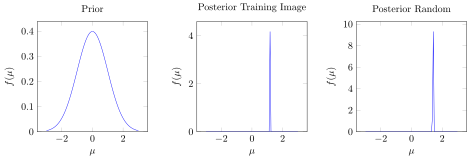

In [133]:
plot_results(npn, X[:, ind], n_prior = 0.01, simple = true, ymin = -3.0, ymax = 3.0)

In [113]:
using BSON
using BSON: @save
@save "../networks/npn_h16_a01_Nformula_lrsched.bson" npn

# Component Analysis

### Predictions

In [135]:
y_pred = npn.decoder(npn.encoder(X));

In [153]:
# ax = Axis(Plots.Scatter(vec(y) .* 10, vec(y_pred) .* 10))
# ax.xlabel = "True Crosstrack Error"
# ax.ylabel = "Predicted Crosstrack Error"
# ax

### Latent Space

In [138]:
using NearestNeighbors

In [139]:
function get_latent_distances(enc, Xin, Xout)
    # Compute latent representations
    Zin = enc(Xin)
    Zout = enc(Xout)

    # Create tree for nearest neighbors
    kdtree = KDTree(Zin)

    _, dists_in = knn(kdtree, Zin, 2)
    dists_in = [dists_in[i][1] for i in 1:length(dists_in)]
    _, dists_out = knn(kdtree, Zout, 1)
    dists_out = [dists_out[i][1] for i in 1:length(dists_out)]

    return dists_in, dists_out
end

get_latent_distances (generic function with 1 method)

In [140]:
Xrand = rand(128, 10000);

In [148]:
Xc, yc = get_taxi_data(1, fn="/scratch/smkatz/NeuralFilter/downsampled_crossing_data.h5", flipped = false);

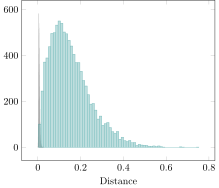

In [143]:
dists_in, dists_out = get_latent_distances(npn.encoder, X, Xrand)
ax = Axis()
push!(ax, Plots.Histogram(dists_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(dists_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Distance"
ax

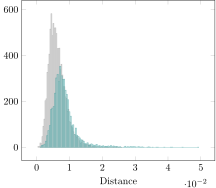

In [149]:
dists_in, dists_out = get_latent_distances(npn.encoder, X, Xc)
ax = Axis()
push!(ax, Plots.Histogram(dists_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(dists_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Distance"
ax

### Flow

In [144]:
z_in = npn.encoder(X)
z_out = npn.encoder(Xrand)

ll_in = logpdf(npn.flow, z_in)
ll_out = logpdf(npn.flow, z_out);

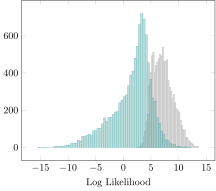

In [147]:
ax = Axis()
push!(ax, Plots.Histogram(ll_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax

In [151]:
z_c = npn.encoder(Xc)
ll_c = logpdf(npn.flow, z_c);

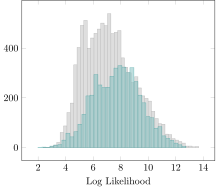

In [152]:
ax = Axis()
push!(ax, Plots.Histogram(ll_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_c, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax

# Fine Tune Flow

In [154]:
npn = train_npn_fine_tune(npn, X, y; 
                    lr_reg = 1e-4,
                    lr_flow = 1e-4,
                    lr_bayes = 1e-4,
                    batchsize = 128,
                    nreg = 0, 
                    nflow = 100, 
                    nbayes = 0)

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.007568993099999
l = -7.335060995142597


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.480185402208387


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.6320998916119835


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.784277716853528


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.94535320814288


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.101163970520547


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.263126843626317
l = -8.425247837496926


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.589981995825093


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.754911678792443
l = -8.928224976579171


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.099947101100371


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.273230050720079


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.448797614048996
l = -9.630123389422685


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.809346803207095


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.985757680789396


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.178928071864124


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.366322629257052


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.558132055858486


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.751361053537062


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.94933020291652


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.144403609985385
l = -11.353838906377465


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.556721806631964


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.76498329005826


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.97733116478944


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.190454626519886
l = -12.411318789030803


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.62389306952708
l = -12.850521670325373


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.072616336496871


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.298639630278512


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.53739379832683


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.769755439013045


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.013842475927405


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.251735071487163
l = -14.500036406744018


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.748221172397367


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.99966657943062


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.253102706017057
l = -15.511432334387743


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.778904310222238


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.037991809493533


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.305104551070524
l = -16.57992032716858


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.853102079530164
l = -17.130256892821656


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.420960078830507


┌ Info: Epoch 51
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.70542287178801


┌ Info: Epoch 52
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.998443880219035
l = -18.293909414214077


┌ Info: Epoch 53
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 54
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.593110496795745


┌ Info: Epoch 55
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.8993304745782
l = -19.207351410599326


┌ Info: Epoch 56
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 57
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -19.52706978765839
l = -19.851616824761223


┌ Info: Epoch 58
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 59
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -20.176817982137692


┌ Info: Epoch 60
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -20.51030825336772
l = -20.84985958097554


┌ Info: Epoch 61
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.189544673711048


┌ Info: Epoch 62
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.544493533205802


┌ Info: Epoch 63
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.90481457984536


┌ Info: Epoch 64
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 65
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -22.26759331254


┌ Info: Epoch 66
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -22.63087139264236
l = -23.008123936691494


┌ Info: Epoch 67
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -23.38190004122677


┌ Info: Epoch 68
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -23.764047480115934


┌ Info: Epoch 69
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 70
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -24.1382813550919
l = -24.520738674234753


┌ Info: Epoch 71
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -24.901257514580326


┌ Info: Epoch 72
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 73
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -25.28093829369665


┌ Info: Epoch 74
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -25.658886488481752


┌ Info: Epoch 75
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -26.03166646519589
l = -26.395842399307128


┌ Info: Epoch 76
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -26.758421379170752


┌ Info: Epoch 77
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -27.11865489331786


┌ Info: Epoch 78
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -27.46667267531298


┌ Info: Epoch 79
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -27.82035247782891


┌ Info: Epoch 80
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -28.14891020940352


┌ Info: Epoch 81
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 82
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -28.48161044460185


┌ Info: Epoch 83
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -28.808202698983052


┌ Info: Epoch 84
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -29.12391062763079


┌ Info: Epoch 85
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -29.443888962088497
l = -29.75401794678317


┌ Info: Epoch 86
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.066156931172173


┌ Info: Epoch 87
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 88
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.37878891915541


┌ Info: Epoch 89
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.68555151093338


┌ Info: Epoch 90
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.99576946170216
l = -31.312962775286625


┌ Info: Epoch 91
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -31.617697895746616


┌ Info: Epoch 92
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -31.940600441285305


┌ Info: Epoch 93
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -32.28143810280231


┌ Info: Epoch 94
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -32.64210427048448


┌ Info: Epoch 95
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -33.01801492940632


┌ Info: Epoch 96
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -33.41031430376186


┌ Info: Epoch 97
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -33.84655265208944


┌ Info: Epoch 98
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 99
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -34.31798848819742


┌ Info: Epoch 100
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -34.830143087274436


NatPN(Chain(Dense(128, 64, relu), Dense(64, 32, relu), Dense(32, 16, relu), Dense(16, 16)), MultivariateTransformed{DiagNormal, Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}}(
dist: DiagNormal(
dim: 16
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0]
)

transform: Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}((RadialLayer{Vector{Float64}, Vector{Float64}}([1.5288147978613569], [-1.144751877297021], [-0.05962509820834169, -0.2370139083003528, 0.1811269549986148, -0.24595666088265658, 1.793343991714361, -0.0008697370286213038, 1.5040068489693998, -1.0036044064449463, -0.934404175967683, 0.32725995191465146, -0.43175956951800576, -0.033502844114992894, 0.3195455714276422, 0.43882560469348497, 0.49531610407852505, -0.20422428254157396]), RadialLayer{Vector{Float64}, Vector{Float64}}([2.163110335858833], [-0.7239658045887324],

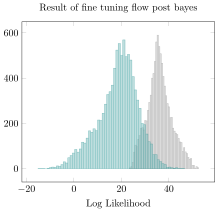

In [158]:
ll_in = logpdf(npn.flow, z_in)
ll_out = logpdf(npn.flow, z_out)

ax = Axis()
push!(ax, Plots.Histogram(ll_in, style = "gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_out, style = "teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax.title = "Result of fine tuning flow post bayes"
ax

In [159]:
@save "../networks/npn_h16_a01_Nformula_lrsched_finetune.bson" npn

# Minimize likelihood of random set

In [162]:
using Random

In [164]:
flow_extra = train_flow_ood(npn.flow, z_in, z_out, 50, 1e-3, 128)

l = -11.836398784063876


┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.147722690926754


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.479780097869504
l = -12.813339401513382


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.101351438672825


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.420365058337248
l = -13.76328057991778


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.073335237056234


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.381436129988016


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.677183443455354
l = -15.13831889316686


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.429906549634111


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.895236859076768
l = -16.277100509109314


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.684772246300604


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.18711168075547


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.611968400486482


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.02494662905041


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.668265127572212


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -19.20596140361696


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -19.77368845871782


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -20.372592102569353


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.03948885954116


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.82502540049332


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -22.525960446159765


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -23.460769868152052


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -24.238593807614897


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -25.311239185231326


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -26.34808903432184


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -27.458310061025443


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -28.697213831083747


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -29.943335983775974


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -31.466396910028894


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -32.96905486124074


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -34.540484626983094


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -36.10894418454149
l = -38.112383917614075


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.16384780669556
l = -42.178192687812384


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -44.10474979151586


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -46.049903134810975


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -48.15173977480069
l = -50.35428642762974


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -52.36496227361779


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -54.2164429819804


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -56.515547983093754


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -58.85068898051284


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -60.962512732368715


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -63.17560206638797


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -65.5664232643751


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


MultivariateTransformed{DiagNormal, Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}}(
dist: DiagNormal(
dim: 16
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0]
)

transform: Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}((RadialLayer{Vector{Float64}, Vector{Float64}}([6.688092596178102], [-4.388022507048973], [-1.8045162254840794, -1.4479684822975283, -1.0800919104848647, 1.58643111092614, 0.16040045800044436, 1.1358187010581027, 2.0921734867746413, -1.1171893418389394, 0.9049373976550785, 0.9659895124841329, 1.0061434107571117, -0.16989520356091176, -0.9900931132705625, 0.46799467764579566, -1.6156674528367359, 1.1224165196674198]), RadialLayer{Vector{Float64}, Vector{Float64}}([7.355363797761818], [-3.9528837653209092], [1.4380137224260052, 1.7995080555053438, 1.1515144941859214, -1.708737275134688, 1.9416170253536305, -0

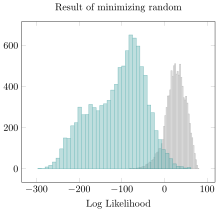

In [166]:
ll_in = logpdf(npn.flow, z_in)
ll_out = logpdf(npn.flow, z_out)

ax = Axis()
push!(ax, Plots.Histogram(ll_in, style = "gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_out, style = "teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax.title = "Result of minimizing random"
ax

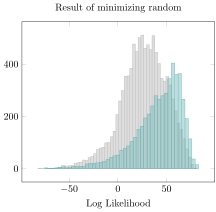

In [168]:
ll_c = logpdf(npn.flow, z_c)

ax = Axis()
push!(ax, Plots.Histogram(ll_in, style = "gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_c, style = "teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax.title = "Result of minimizing random"
ax

In [170]:
flow_extra = train_flow_ood(npn.flow, z_in[:, 1:5000], z_c, 50, 1e-3, 128)

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 5.458358071307929


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -0.07300502986401725
l = -2.4370023063808084


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.935481411442346


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.481556153029246


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.8201717768979


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.151260374065295


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.48075177398497


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -9.798806104302841


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.054172380998317
l = -10.46472899719511


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -10.332605805683144


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.094757960397509


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.309290112790784


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.425177576025106
l = -11.797247968606065


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.029845203102454


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.19647616376156


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.387620518136984
l = -12.663836472311239


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.88840180368826


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.092540324934305
l = -13.261907720124931


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.298591877519897


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.777044276206475


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.894453736582335


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.113396057591316
l = -14.150761346083513


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.57684003509749


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.660939140443276
l = -14.886506497324163


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.931331271045678
l = -15.405959001951786


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.532633232646319


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -15.76677852287662
l = -15.946285551164749


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.144888996742438


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.45946084939405
l = -16.68724089521328


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.913570940679847


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.127835667991718
l = -17.26124757891766


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.58411465039879


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.760830482377642


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.652925072261596


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.15873655574319
l = -18.53812399829404


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.652330464790793


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.932455862506444


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -18.998637570972548


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


MultivariateTransformed{DiagNormal, Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}}(
dist: DiagNormal(
dim: 16
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0]
)

transform: Composed{NTuple{8, RadialLayer{Vector{Float64}, Vector{Float64}}}, 1}((RadialLayer{Vector{Float64}, Vector{Float64}}([8.785202300154198], [-5.930720850702706], [-1.9269762256278904, -1.9508822268312587, -1.7559636807935717, 2.12676613388288, -0.6867050027033016, 0.7979193364592917, 2.053290760202792, -0.6943066868671878, 1.024369441438964, 0.530858786611749, 1.196665028412133, 0.14772365142152666, -1.7785162935899845, 0.49287443639978945, -2.2865215513640416, 1.7669786565123606]), RadialLayer{Vector{Float64}, Vector{Float64}}([9.648057992103897], [-5.650406093827089], [3.0529453713377723, 3.430936735334004, 0.974302951003953, -2.0500950933295785, 1.432190670983387, -0.9536817

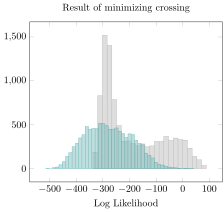

In [173]:
ll_in = logpdf(npn.flow, z_in)
ll_out = logpdf(npn.flow, z_out)

ax = Axis()
push!(ax, Plots.Histogram(ll_in, style = "gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_out, style = "teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax.title = "Result of minimizing crossing"
ax

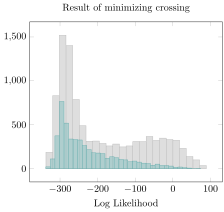

In [174]:
ll_c = logpdf(npn.flow, z_c)

ax = Axis()
push!(ax, Plots.Histogram(ll_in, style = "gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_c, style = "teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax.title = "Result of minimizing crossing"
ax